In [8]:
# read the network
filepath = 'grafo.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#print(vertices)
#array con 1 elemento: numero vertice, 2 elemento: grupo que se encuentra
# resto son los vertices con los que se comunica
#print(edges)

read vertices
read edge


Tamaño poblacion
1000
cantidad de pares de comunicacion


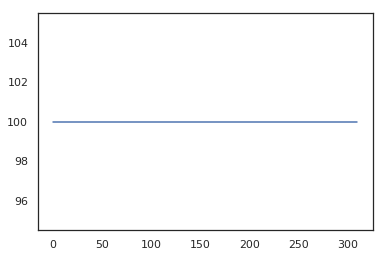

Porcentaje grupos con distinta media de crimen
[0.314 0.359 0.327]
Vector media de crimen por grupos
[0.05, 0, 0.5]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
Homofilia
0.9410256410256411
Grafica PoS individual


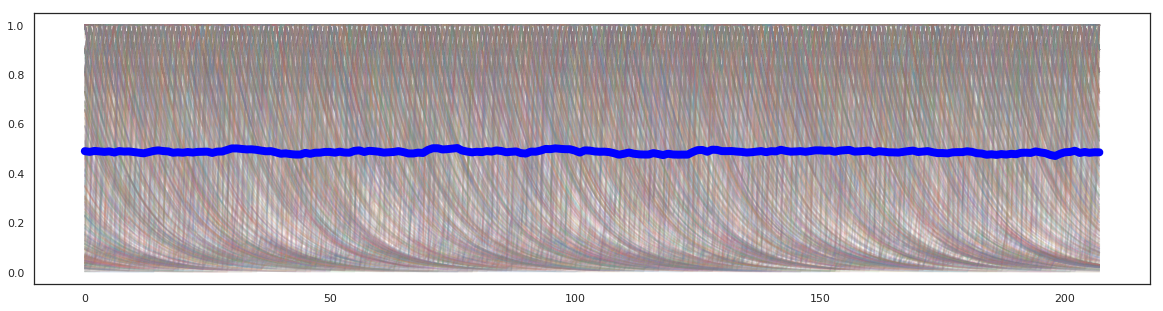

PoS media por grupos


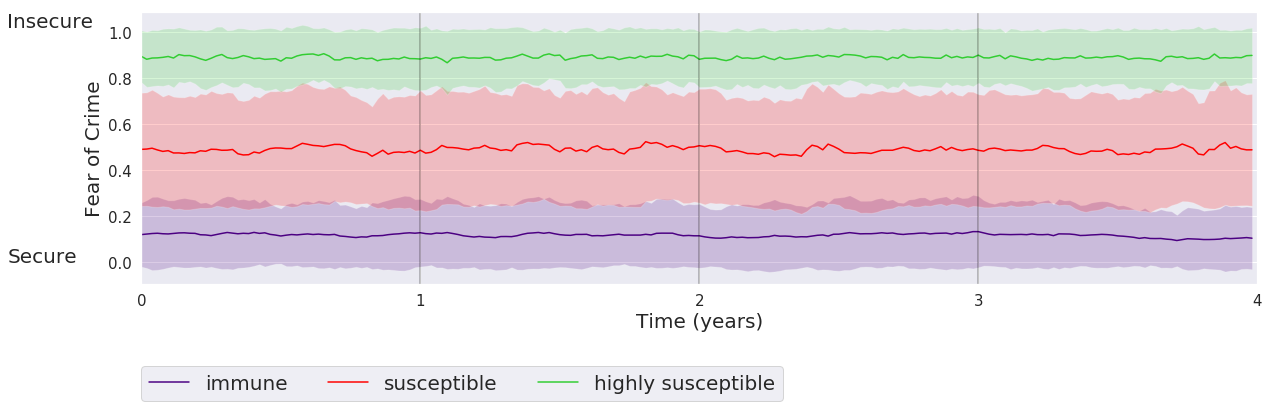

In [9]:
#Simulacion Pos
import numpy as np
import random
import matplotlib.pyplot as plt
n=len(vertices)
#vector identificacion de grupo
g=np.zeros(n)
for i in range(n):
    g[i]=vertices[i][1]
# cantidad de grupos
m=int(max(g)+1)
#porcentaje de cada grupo
q=np.zeros(m)
for i in range(m):
    q[i]=sum((g==i)*1.0)/n
#periodos en semanas
T=312 #6 años
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
# lamda = np.random.rand(m)  # tasas de crimen de los grupos
# lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune
lamda=[0.05,0,0.5]
#identificacion de cada sujeto con su respectiva media de crimen
for i in range(n):
    for j in range(m):
        if g[i]==j:
            g[i]=lamda[j]
homofilia=np.zeros(T)
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
        
        
        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k] 
        
        #escogemos las parejas de comunicacion 
        paleatorio=np.random.permutation(np.arange(n))#personas grupo 1 en orden aleatorio
        persona1=paleatorio[:int(n*0.1)] #primer 10%
        persona2=np.zeros_like(persona1)


        for k in range(len(persona1)):
            #para grupo 1
            aux1=persona1[k]
            aux2=np.random.choice(vertices[aux1][2:])
            contador=0
            while aux2 in persona1 or aux2 in persona2:
                aux2=np.random.choice(vertices[aux1][2:])
                contador=contador+1
                if contador>5:
                        break
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])

            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
        
        parescom[t]=len(persona1)
        homofilia[t]=commismogrupo[t]/parescom[t]
    

        St[t] = s
print("Tamaño poblacion")
print(n)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("Homofilia")
print(np.mean(homofilia))

%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[104:],alpha=0.1)
plt.plot(np.mean(St[104:],axis=1),'blue',linewidth=8)
plt.show()
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
print("PoS media por grupos")
colores=["Red","indigo","limegreen"]
G=[]
for i in [1,0,2]:
    grupo=np.zeros((T,int(n*q[i])))
    contador=0
    for k in range(n):
        if g[k]==lamda[i]:
            grupo[:,contador]=St[:,k]
            contador=contador+1
    #plt.plot(grupo,alpha=0.1)
    G.append(grupo[104:].T)
    sns.tsplot(data=grupo[104:].T,ci='sd',color=colores[i])
h = plt.gca().get_lines()
plt.legend(handles=h,labels=["immune","susceptible","highly susceptible" ],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("Fear of Crime",fontsize=20)
ax = plt.axes()
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
ax.tick_params(labelsize=15)
plt.text(-25, 1.02,'Insecure', fontsize=20)
plt.text(-25, 0,'Secure', fontsize=20)
plt.savefig('expgraph1.pdf',bbox_inches="tight")
                

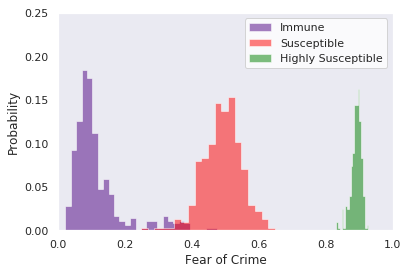

In [10]:
gi=G[0]
gs=G[1]
gh=G[2]

gimean=np.zeros(gi.shape[0])
for i in range(gi.shape[0]):
    gimean[i]=np.mean(gi[i])


gsmean=np.zeros(gs.shape[0])
for i in range(gs.shape[0]):
    gsmean[i]=np.mean(gs[i])


ghmean=np.zeros(gh.shape[0])
for i in range(gh.shape[0]):
    ghmean[i]=np.mean(gh[i])


weights = np.ones_like(gimean)/float(len(gimean))
sns.distplot(gimean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='indigo')

weights = np.ones_like(gsmean)/float(len(gsmean))
sns.distplot(gsmean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='red')
    
weights = np.ones_like(ghmean)/float(len(ghmean))
sns.distplot(ghmean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='green')    
sns.set_style("white")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,0.25)
plt.legend(["Immune","Susceptible","Highly Susceptible" ])
plt.xlabel('Fear of Crime')
plt.ylabel('Probability')
plt.savefig("dist_3g.pdf")

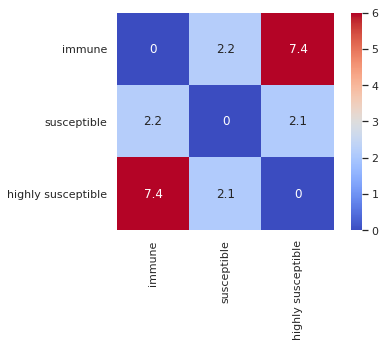

In [11]:
gi=G[0]
gs=G[1]
gh=G[2]
tiempo=gi.shape[1]
gimean=np.zeros(tiempo)
gistd=np.zeros(tiempo)
gsmean=np.zeros(tiempo)
gsstd=np.zeros(tiempo)
ghmean=np.zeros(tiempo)
ghstd=np.zeros(tiempo)
for i in range(tiempo):
    gimean[i]=np.mean(gi[i][:])
    gsmean[i]=np.mean(gs[i][:])
    ghmean[i]=np.mean(gh[i][:])
    gistd[i]=np.std(gi[i][:])
    gsstd[i]=np.std(gs[i][:])
    ghstd[i]=np.std(gh[i][:])
g=[(gi,gimean,gistd),(gs,gsmean,gsstd),(gh,ghmean,ghstd)]
D=np.zeros((3,3))
for k in range(3):
    for n in range(3):
        d=np.zeros(tiempo)
        for i in range(tiempo):
            N1=g[k][0].shape[0]
            N2=g[n][0].shape[0]
            s2=((N1-1)*g[k][2][i]**2+(N2-1)*g[n][2][i]**2)/(N1+N2-2)
            d[i]=(g[k][1][i]-g[n][1][i])/np.sqrt(s2)
        D[k][n]=abs(np.mean(d))
                
D
ax = sns.heatmap(D,annot=True,cmap="coolwarm",
                 square=True,
                 xticklabels=["immune","susceptible","highly susceptible"],
                 yticklabels=["immune","susceptible","highly susceptible"],
                 vmin=0,vmax=6)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.savefig("graph_matrix.svg")

In [12]:
for i in range(m):
    print(np.mean(g[i][1]))

0.10384889796080977
0.489499002230486
0.890021835628022


In [13]:
D

array([[0.        , 2.18862356, 7.4241762 ],
       [2.18862356, 0.        , 2.12629254],
       [7.4241762 , 2.12629254, 0.        ]])

In [110]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps

def area(g1,g2):
    mu1, std = norm.fit(g1)
    plt.hist(g1, bins=25, density=True, alpha=0.6)
    x = np.linspace(0,1,100)
    fitted_pdf1 = norm.pdf(x,loc =mu1,scale = std)

    plt.plot(x,fitted_pdf1,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)

    mu2, std = norm.fit(g2)
    plt.hist(g2, bins=25, density=True, alpha=0.6)
    fitted_pdf2 = norm.pdf(x,loc =mu2,scale = std)

    plt.plot(x,fitted_pdf2,"orange",label="Fitted normal dist",linestyle="dashed", linewidth=2)

    plt.show()
    idx = np.argwhere(np.diff(np.sign(fitted_pdf1 - fitted_pdf2))).flatten()
    
    if mu1 < mu2 :
        return simps(fitted_pdf2[:idx[0]],dx=0.01)+simps(fitted_pdf1[idx[0]:],dx=0.01)
    else:
        return 0

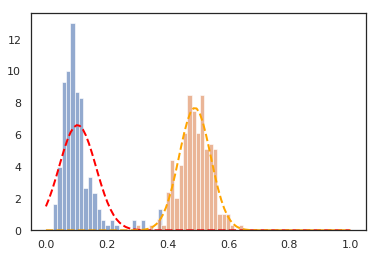

0.0005526991980416059

In [112]:
area(gimean,gsmean)

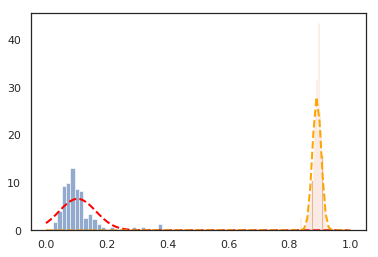

4.3407922234606395e-26

In [115]:
area(gimean,ghmean)

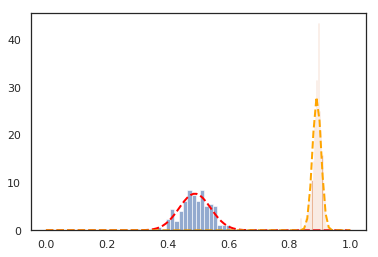

1.3140860100272698e-09

In [114]:
area(gsmean,ghmean)